### BUFN400---University of Maryland 

# Homework 4: Geometric Brownian Motion and Log Utility

### By Albert S. (Pete) Kyle

### October 28, 2023


$\renewcommand{\E}{\mathrm{E}}$
$\renewcommand{\e}{\mathrm{e}}$
$\renewcommand{\drm}{\mathrm{\, d}}$
$\renewcommand{\var}{\mathrm{var}}$
$\renewcommand{\cov}{\mathrm{cov}}$
$\renewcommand{\stdev}{\mathrm{stdev}}$
$\renewcommand{\sm}{ {\scriptstyle{*}} }$
$\renewcommand{\mm}{{\scriptsize @}}$
$\renewcommand{\t}{^{\mathsf{T}}}$
$\renewcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Problem 1: Geometric Brownian Motion

Consider a hypothetical stock market portfolio whose value follows geometric brownian motion.  Assume the continuously compounded real rate of interest is $r_\text{real} = 1$ percent per year, the continuously compounded inflation rate is $i = 4$ percent per year, the continuously compounded risk premium is $\pi = 6$ percent per year, and the annualized standard deviation of log returns is $\sigma = 20$ percent.

A. Display a small dataframe showing the expected nominal value to which one dollar grows after 1, 2, 5, 10, 20, 30, and 100 years. (Hint: The expected value after one year is $1.116\,278$ dollars. Remember that "nominal" returns include inflation, but "real" returns do not. The $\sigma^2/2$ adjustment is not relevant here.)

## Solution
$$\bar{r} = r_{real} + i + \pi = 0.01 + 0.04 + 0.06 = 0.11$$
Now, using the definition of continuously compounded interest,
$$V_1 = e^{\bar{r}t} = V_0e^{(r_{real} + i + \pi) * t}$$

In [18]:
r_real = 0.01 
i = 0.04      
pi = 0.06    
V_0 = 1
years = [1, 2, 5, 10, 20, 30, 100]
expected_nominal_values = [V_0 * (np.exp((r_real + i + pi)) * t) for t in years]

df = pd.DataFrame({'Years': years, 'Expected Nominal Value': expected_nominal_values}).set_index("Years")
df

,Expected Nominal Value
Years,
1,1.116278
2,2.232556
5,5.581390
10,11.162781
20,22.325561
30,33.488342
100,111.627807


B. Simulate $N=5000$ sample paths of monthly returns over 100 years. (Hint: If you simulate a Brownian motion and then exponentiate it, remember to adjust the mean of the Brownian motion down by $\frac{\sigma^2}{2} \sm \Delta t$ to make the sample mean of the geometric Brownian motion correct.) 

   1. Along each of the $N$ sample paths, calculate the following statistics: sample mean of nominal monthly gross returns, sample variance of nominal gross monthly returns, sample mean of nominal monthly log returns, and sample variance of nominal monthly log returns over the first 1, 2, 5, 10, 20, 30, 100 years.

   2. Calculate the sample means and sample standard deviations of the $N$ observations for these four statistics over the the 7 time periods. Display a dataframe comparing the sample means and standard deviations of these four statistics with the predicted mean of these four statistics.

   3. What fraction of the portfolios are expected to beat the expected return? What fraction of the portfolios actually beat the expected return? Explain why these fractions are not one half.

## Solution

Here we ue Numpy to simulate the 5000 sample paths, which is relatively straightforward. Note that the mean $\mu$ is adjusted down by the factor $\frac{\sigma^2}{2}$.


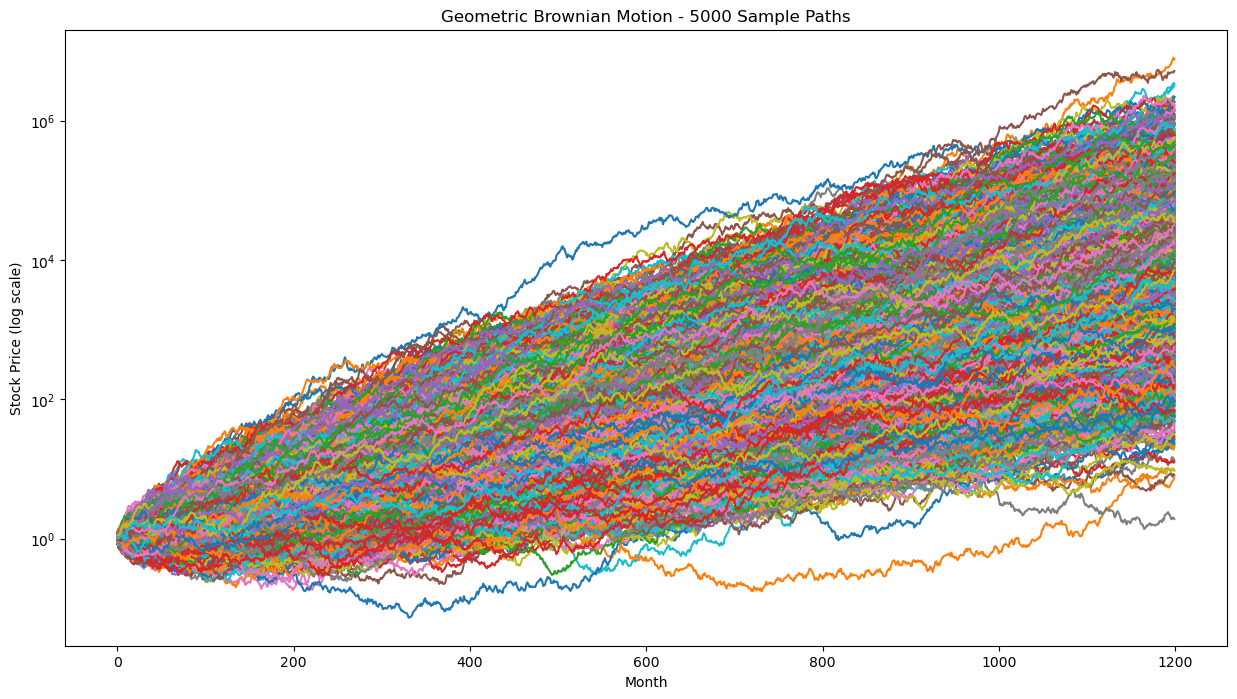

In [233]:
# Define some helper variables
number_of_years = 100
months_per_year = 12
m = 5000
rbar_per_year = r_real + i + pi
p0 = 1.0
sigma = 0.2 / np.sqrt(12) # monthly volatility
n = number_of_years * months_per_year # 1200
rbar = rbar_per_year / months_per_year
# Note adjusting by \frac{\sigma^2}{2} * \Delta t
mu = rbar - sigma * sigma * 0.50

# Create a generator and then modify the sample normal distribution to get N(\mu, \sigma^2)
rng = np.random.default_rng(seed=12345)
dz = rng.standard_normal(n * m).reshape(n, m)
# P is of shape (1200, 5000)
P = p0 * np.exp((sigma * dz + mu).cumsum(axis=0))
t = np.array(range(n))

fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title("Geometric Brownian Motion - 5000 Sample Paths")
ax.set_xlabel("Month")
ax.set_ylabel("Stock Price (log scale)")
ax.plot(t, P, markersize=0.25)
ax.set_yscale('log', base=10)
plt.show()


### 1. Computing the 4 Statistics

In [234]:
paths = pd.DataFrame(P, index=range(1, 1201)).rename_axis("Month").rename_axis("Path", axis=1)
paths_gross_returns = (paths.pct_change() + 1).fillna(method="bfill")
years = [1, 2, 5, 10, 20, 30, 100]
df = {}
for year in years:
    months = year * 12
    curr = paths_gross_returns.head(months)
    data = {}
    data["Sample Mean of Nominal Monthly Gross Returns"] = np.mean(curr)
    data["Sample Variance of Nominal Monthly Gross Returns"] = np.var(curr)
    data["Sample Mean of Nominal Monthly Gross Log Returns"] = np.mean(np.log(curr))
    data["Sample Mean of Nominaly Monthly Gross Variance Log Returns"] = np.var(np.log(curr))
    df[year] = pd.DataFrame(data)
    display(f"After {year} year(s)", df[year])


'After 1 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,0.996320,0.005703,-0.006506,0.005588
1,1.009178,0.002686,0.007817,0.002639
2,1.007660,0.001564,0.006877,0.001491
3,0.998574,0.002284,-0.002620,0.002435
4,1.052010,0.002061,0.049794,0.001795
...,...,...,...,...
4995,1.005962,0.001887,0.005010,0.001869
4996,1.046928,0.004233,0.043896,0.003964
4997,1.023112,0.002664,0.021600,0.002477


'After 2 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,1.007437,0.003631,0.005626,0.003565
1,1.023060,0.002506,0.021595,0.002411
2,1.012103,0.001698,0.011202,0.001656
3,0.996985,0.002985,-0.004543,0.003071
4,1.039231,0.002095,0.037523,0.001904
...,...,...,...,...
4995,1.008882,0.004990,0.006452,0.004728
4996,1.013489,0.003944,0.011502,0.003773
4997,1.024538,0.004338,0.022120,0.004307


'After 5 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,1.009988,0.003390,0.008261,0.003375
1,1.011494,0.002876,0.010033,0.002782
2,1.009651,0.002876,0.008150,0.002957
3,1.008160,0.002966,0.006669,0.002918
4,1.009649,0.003091,0.008092,0.003021
...,...,...,...,...
4995,1.011436,0.004003,0.009426,0.003885
4996,1.010837,0.002910,0.009368,0.002809
4997,1.023030,0.004894,0.020452,0.004620


'After 10 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,1.009914,0.003580,0.008106,0.003525
1,1.010651,0.003399,0.008924,0.003352
2,1.014836,0.002701,0.013396,0.002685
3,1.007874,0.003236,0.006257,0.003167
4,1.006702,0.003495,0.004965,0.003422
...,...,...,...,...
4995,1.012641,0.003361,0.010928,0.003267
4996,1.017266,0.002923,0.015701,0.002842
4997,1.012701,0.004449,0.010474,0.004276


'After 20 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,1.009821,0.003545,0.008044,0.003454
1,1.004167,0.003817,0.002281,0.003743
2,1.013550,0.003333,0.011826,0.003281
3,1.008671,0.003272,0.007035,0.003192
4,1.005466,0.003032,0.003956,0.002986
...,...,...,...,...
4995,1.012928,0.002903,0.011436,0.002815
4996,1.013369,0.003001,0.011814,0.002938
4997,1.011156,0.003750,0.009261,0.003669


'After 30 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,1.007089,0.003625,0.005272,0.003592
1,1.003561,0.003503,0.001829,0.003440
2,1.015658,0.003394,0.013884,0.003316
3,1.010151,0.003592,0.008353,0.003485
4,1.006738,0.003121,0.005177,0.003076
...,...,...,...,...
4995,1.011801,0.002849,0.010339,0.002792
4996,1.011621,0.003067,0.010055,0.003000
4997,1.010164,0.003793,0.008256,0.003715


'After 100 year(s)'

,Sample Mean of Nominal Monthly Gross Returns,Sample Variance of Nominal Monthly Gross Returns,Sample Mean of Nominal Monthly Gross Log Returns,Sample Mean of Nominaly Monthly Gross Variance Log Returns
Path,,,,
0,1.009287,0.003625,0.007471,0.003545
1,1.007931,0.003394,0.006237,0.003320
2,1.008590,0.003415,0.006877,0.003354
3,1.011150,0.003617,0.009322,0.003531
4,1.009265,0.003141,0.007682,0.003079
...,...,...,...,...
4995,1.010087,0.003056,0.008543,0.002987
4996,1.010270,0.003161,0.008673,0.003087
4997,1.011591,0.003293,0.009920,0.003206


C. EXTRA CREDIT: Repeat the analysis in part B using daily data for 1 "year" of 12 "months", each of which as 20 trading days, and subintervals of 1, 4, 12 "months". Compare the results for 12 months of daily data with the results for one year of monthly data. Do the means and standard deviations of the four statistics change much? Specifically, do your results support the intuition that more frequent observations of returns data do not make and estimate of mean returns more accurate but do make estimates of returns standard deviations more accurate?

# Problem 2: Growth Optimal Portfolio

This problem is a continuation of Problem 1.

Consider an investor who allocates his wealth between the stock market portfolio and a riskfree money market fund earning the real rate plus inflation rate every year. The investor chooses a fixed target fraction of wealth to invest in the equity portfolio. At the end of each month, the investor trades to rebalance the portfolio so that it holds the target fractions in the stock portfolio and the money market fund at the beginning of the next month. Assume that the investor has log utility. As an approximation, this means that the investor chooses the fraction $\alpha$ to invest in stocks to maximize the function $\mu(\alpha) - \tfrac{1}{2} \sm \rho \sm \sigma^2(\alpha)$, where $\mu(\alpha)$ is the expected continuously compounded return on the stock market portfolio, $\sigma^2(\alpha)$ is the variance of log returns on the portfolio, and $\rho=1$ for log utility.

   A. Show that $\mu(\alpha)$ is a simple linear function of $\alpha$, $\sigma^2(\alpha)$ is a simple quadratic function of $\alpha$, and the optimal value of $\alpha$ is $1.50$. Therefore, the optimizing investor invests 150 percent of his wealth in the stock market portfolio and finances this by borrowing 50 percent of the portfolio at the risk-free rate.  Show that the probability of the optimizing investor earning a portfolio return of $-100$ percent in one month is small enough that we might (or might not?) be justified in ignoring it.

   B. Simulate 5000 sample paths of 100 years of monthly rebalanced portfolios with 8 different fractions of wealth in the stock market portfolio equal to 0, 60, 80, 100, 125, 150, 200, and 250 percent. Does bankruptcy ever become sufficiently likely that it cannot be ignored? How should potential bankruptcy be dealt with? For time periods equal to the first 1, 2, 5, 10, 20, 30, and 100 years, calculate a frequency distribution describing which of the 8 portfolios has the highest value at the end of the period. Display the results as a dataframe in which the rows are the 7 time intervals and the columns are the 8 portfolio weights.

   C. Explain whether your results illustrate the concept of "growth optimal portfolio". Specifically, does the portfolio chosen by the log-utility investor beat all of the other portfolios a large fraction of the time, even the portfolios with more leverage and therefore a higher expected return?